In [1]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
#https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#1introduction
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#spacy
import spacy
from nltk.corpus import stopwords

#vis
import pyLDAvis


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
import pyLDAvis.gensim_models
import pandas as pd, numpy as np

In [4]:
df=pd.read_csv('data_latest_without_any special characters_follow tweetss.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'user', 'date', 'tweets', 'user_location', 'tweetss'], dtype='object')

In [6]:
df=df[['user', 'date','user_location', 'tweetss']]

In [7]:
df

,user,date,user_location,tweetss
0,"{'username': 'LatebirdVeloz', 'id': 2545627424...",2019-01-07 23:58:19+00:00,Riviera Maya / CDMX ???Ã½???Â« ????,go hell bob parsons spineless fuck stop cowar...
1,"{'username': 'ANDREAG13353939', 'id': 87907853...",2019-01-07 23:56:23+00:00,"Colorado, USA",proudly presenting check let know think none g...
2,"{'username': 'GirlsinTech', 'id': 16014840, 'd...",2019-01-07 23:52:07+00:00,Global,want boss don t need go biz school entrepreneu...
3,"{'username': 'mark_callwood', 'id': 9057451792...",2019-01-07 23:46:48+00:00,Surrey,every cunty elephant killing bob parsons hundr...
4,"{'username': 'MccrelessTravis', 'id': 10715028...",2019-01-07 23:44:10+00:00,"Mackinaw city, michigan",proudly presenting check let know think gocent...
...,...,...,...,...
307115,"{'username': 'GoDaddyUK', 'id': 2511235328, 'd...",2022-09-23 07:50:12+00:00,UK,era advancing technology everevolving ways wor...
307116,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:50:33+00:00,"Roma, Lazio",possible threat phishing
307117,"{'username': 'ecarlesi', 'id': 19444180, 'disp...",2022-09-23 07:55:09+00:00,"Roma, Lazio",possible threat
307118,"{'username': 'ARCH1V3S23', 'id': 1498900982209...",2022-09-23 08:04:14+00:00,"she/they, minor, works on Ã¢ÂÂ¡Ã¯Â¸Â",adobe express u nawt hv layer something like c...


In [4]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [8]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
review_data=df.copy()

In [11]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307120 entries, 0 to 307119
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user           307120 non-null  object
 1   date           307120 non-null  object
 2   user_location  307120 non-null  object
 3   tweetss        307120 non-null  object
dtypes: object(4)
memory usage: 9.4+ MB


In [6]:
review_data.dropna(axis = 0, how ='any',inplace=True) 



review_data['tweets'] = review_data['tweetss'].apply(clean_text)
review_data['Num_words_text'] = review_data['tweetss'].apply(lambda x:len(str(x).split())) 

mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]

print('No of Short reviews')
print(len(df_short_reviews))



NameError: name 'review_data' is not defined

In [13]:
df_short_reviews

,user,date,user_location,tweetss,tweets,Num_words_text
8,"{'username': 'ItsikRomano', 'id': 57819532, 'd...",2019-01-07 23:26:54+00:00,Montreal - Quebec - Canada,sell contact info spammers india since purcha...,sell contact info spammers india since purchas...,26
30,"{'username': 'LaDonaHarvey', 'id': 225056299, ...",2019-01-07 22:14:10+00:00,San Diego,happen last time registered domain name phone ...,happen last time registered domain name phone ...,20
47,"{'username': 'maryderrickart', 'id': 562518183...",2019-01-07 21:28:03+00:00,Canada,disgusting pos kills fun founder time boycott...,disgusting kills founder time boycott ahole kn...,26
58,"{'username': '_STD_', 'id': 480888266, 'displa...",2019-01-07 20:59:56+00:00,Nor Cal,mmanerd top three things mentioned suffice wor...,mmanerd three things mentioned suffice wordpre...,20
65,"{'username': 'LonTaylor7', 'id': 1045821487876...",2019-01-07 20:30:52+00:00,"Newport, NJ",greatest plague since dawn time narcissistic ...,greatest plague since dawn time narcissistic p...,20
...,...,...,...,...,...,...
307096,"{'username': 'OhINoSheTwitent', 'id': 13933296...",2022-09-23 02:56:49+00:00,World,quentin latham one confirmed via abuses ts mad...,quentin latham confirmed abuses made clear fed...,27
307100,"{'username': 'codebeastmode', 'id': 9650420613...",2022-09-23 04:05:05+00:00,"Tampa, FL",negative whos driving many votes take agree w...,negative whos driving many votes take agree we...,22
307104,"{'username': 'TheAdamKingShow', 'id': 15649842...",2022-09-23 04:51:11+00:00,Los Angeles,check newly updated webpage we ve added ad...,check newly updated webpage added additional p...,24
307107,"{'username': 'SmokingGun', 'id': 192824056, 'd...",2022-09-23 05:16:03+00:00,"Perth, Western Australia",harmful effects week trespassing traps queen e...,harmful effects week trespassing traps queen e...,25


In [9]:
df=pd.read_csv('df_sampled_rough.csv')

In [11]:
df.drop(columns='Unnamed: 0',inplace=True)

In [13]:
df.head(5)

,user,date,user_location,tweetss,tweets,Num_words_text
0,"{'username': 'ItsikRomano', 'id': 57819532, 'd...",2019-01-07 23:26:54+00:00,Montreal - Quebec - Canada,sell contact info spammers india since purcha...,sell contact info spammers india since purchas...,26
1,"{'username': 'LaDonaHarvey', 'id': 225056299, ...",2019-01-07 22:14:10+00:00,San Diego,happen last time registered domain name phone ...,happen last time registered domain name phone ...,20
2,"{'username': 'maryderrickart', 'id': 562518183...",2019-01-07 21:28:03+00:00,Canada,disgusting pos kills fun founder time boycott...,disgusting kills founder time boycott ahole kn...,26
3,"{'username': '_STD_', 'id': 480888266, 'displa...",2019-01-07 20:59:56+00:00,Nor Cal,mmanerd top three things mentioned suffice wor...,mmanerd three things mentioned suffice wordpre...,20
4,"{'username': 'LonTaylor7', 'id': 1045821487876...",2019-01-07 20:30:52+00:00,"Newport, NJ",greatest plague since dawn time narcissistic ...,greatest plague since dawn time narcissistic p...,20


In [14]:
df_sampled=df_short_reviews.copy()

In [7]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_sampled['tweetss']=df_sampled['tweetss'].apply(remove_stopwords)


NameError: name 'df_sampled' is not defined

In [14]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [15]:
#df_sampled.to_csv('df_sampled_rough.csv')
df_sampled=pd.read_csv('df_sampled_rough.csv')

In [16]:
text_list=df_sampled['tweetss'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

happen last time registered domain name phone call phone call phone call may change damned number spitting nailsomg 
['last', 'time', 'domain', 'name', 'phone', 'call', 'phone', 'call', 'phone', 'call', 'number', 'nailsomg']


In [17]:
print(tokenized_reviews[2])

['disgusting', 'fun', 'founder', 'time', 'boycott', 'ahole', 'd', 'love', 'jail', 'innocent', 'beautiful', 'animal', 'fun', 'camera', 'asshole', 'amp', 'picture']


In [18]:
#Create vocabulary dictionary and document term matrix
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [33]:
lda_model.print_topics()  #Topics with their keywords (scored from highest to lowest)

[(0,
  '0.029*"size" + 0.022*"system" + 0.021*"solution" + 0.020*"r" + 0.019*"large" + 0.015*"share" + 0.014*"whole" + 0.013*"world" + 0.011*"career" + 0.010*"man"'),
 (1,
  '0.067*"provider" + 0.048*"detail" + 0.029*"order" + 0.029*"e" + 0.026*"cpanel" + 0.021*"similar" + 0.019*"data" + 0.015*"wordpress" + 0.013*"button" + 0.012*"hostgator"'),
 (2,
  '0.102*"social" + 0.099*"medium" + 0.047*"amp" + 0.026*"video" + 0.020*"right" + 0.020*"life" + 0.018*"comhow" + 0.012*"step" + 0.012*"available" + 0.010*"recent"'),
 (3,
  '0.034*"customer" + 0.031*"service" + 0.029*"time" + 0.022*"bigrock" + 0.021*"support" + 0.019*"day" + 0.018*"account" + 0.018*"issue" + 0.018*"website" + 0.015*"company"'),
 (4,
  '0.123*"business" + 0.027*"online" + 0.027*"brand" + 0.021*"small" + 0.019*"rare" + 0.017*"startup" + 0.017*"platform" + 0.016*"owner" + 0.015*"market" + 0.014*"top"'),
 (5,
  '0.271*"domain" + 0.068*"name" + 0.031*"registration" + 0.025*"com" + 0.022*"year" + 0.019*"registrar" + 0.017*"chea

In [16]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.265866  0.113036       1        1  22.999550
5     -0.139753 -0.387260       2        1  16.001446
7     -0.131099  0.034774       3        1  13.420542
6     -0.191686  0.135716       4        1  11.505434
8     -0.044244  0.049081       5        1   8.083961
4      0.059101  0.020382       6        1   7.455055
9      0.174434  0.039901       7        1   5.953630
0      0.180715  0.029579       8        1   5.799477
2      0.166993 -0.078085       9        1   5.740885
1      0.191404  0.042876      10        1   3.040021, topic_info=           Term          Freq         Total Category  logprob  loglift
3        domain  20500.000000  20500.000000  Default  30.0000  30.0000
292       email   5631.000000   5631.000000  Default  29.0000  29.0000
78     business   4344.000000   4344.000000  Default  28.0000  28.0000
68          web   5108.000000   5108.000000  Default  27.0000  27.0000
8          name   5146.000000   5146.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1852      brain     85.542884     86.462756  Topic10  -5.1224   3.4826
2943          n     83.406320     84.326127  Topic10  -5.1477   3.4823
8807      estas     82.802363     83.722186  Topic10  -5.1550   3.4823
433   wordpress    220.155756   4040.084449  Topic10  -4.1771   0.5836
69      website    108.244211   6601.124863  Topic10  -4.8870  -0.6173

[448 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
120       1  0.887717     able
120       4  0.111515     able
377       5  0.994880    abuse
434       1  0.847855   access
434       4  0.150622   access
...     ...       ...      ...
70        1  0.391318     year
70        2  0.456764     year
70        4  0.097898     year
70        5  0.053721     year
2458      6  0.993876  youtube

[519 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 6, 8, 7, 9, 5, 10, 1, 3, 2])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.376410990924025


In [21]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=60, step=1)

In [24]:
coherence_values

[-3.538867562646473,
 -3.865971536583471,
 -4.858403458493012,
 -4.2271228767587985,
 -5.953064562169256,
 -5.553982107995451,
 -7.2085630839008905,
 -5.486603218468159,
 -5.424166550744249,
 -6.0411748323934225,
 -6.159933216450905,
 -6.440869748925749,
 -6.403208148535232,
 -6.632817215219101,
 -6.600395851167419,
 -6.595201800623609,
 -6.853830230647339,
 -7.3170085980304345,
 -7.021452989767876,
 -7.624573336994155,
 -7.055059714686272,
 -7.456019341530306,
 -7.5076217936816745,
 -8.154623558091311,
 -8.593592563052296,
 -8.278028445225804,
 -8.096684076701854,
 -8.606700833822988,
 -8.423464603328197,
 -9.05453153829358,
 -8.43134508615099,
 -9.004619197624127,
 -9.107011516119039,
 -9.184590842875922,
 -9.22051360974572,
 -9.51060712913149,
 -9.203582214431012,
 -9.790705796410231,
 -9.663469084208314,
 -9.097790658332855,
 -9.978664943616156,
 -9.60256918315426,
 -9.65029485531356,
 -10.203271151285348,
 -10.020103187985772,
 -10.51762097141221,
 -10.036184237640388,
 -9.9749497

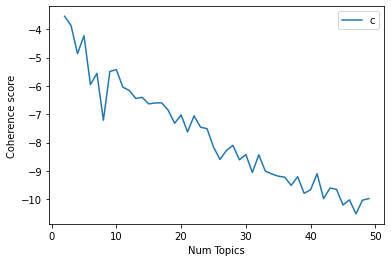

In [25]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

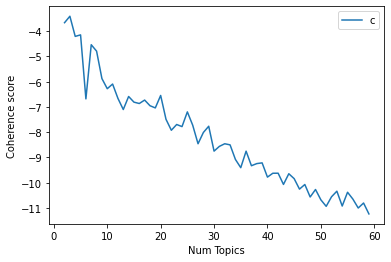

In [23]:
# Show graph
limit=60; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

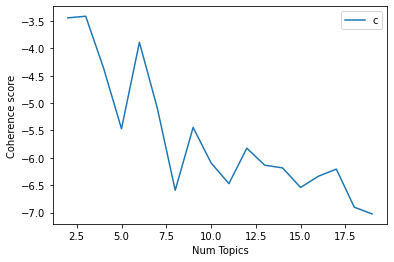

In [21]:
# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of -3.6615
Num Topics = 3  has Coherence Value of -3.4058
Num Topics = 4  has Coherence Value of -4.204
Num Topics = 5  has Coherence Value of -4.1437
Num Topics = 6  has Coherence Value of -6.6799
Num Topics = 7  has Coherence Value of -4.5339
Num Topics = 8  has Coherence Value of -4.7883
Num Topics = 9  has Coherence Value of -5.8755
Num Topics = 10  has Coherence Value of -6.2762
Num Topics = 11  has Coherence Value of -6.0919
Num Topics = 12  has Coherence Value of -6.6605
Num Topics = 13  has Coherence Value of -7.1013
Num Topics = 14  has Coherence Value of -6.5851
Num Topics = 15  has Coherence Value of -6.809
Num Topics = 16  has Coherence Value of -6.8631
Num Topics = 17  has Coherence Value of -6.7266
Num Topics = 18  has Coherence Value of -6.9507
Num Topics = 19  has Coherence Value of -7.0373
Num Topics = 20  has Coherence Value of -6.5438
Num Topics = 21  has Coherence Value of -7.4883
Num Topics = 22  has Coherence Value of -7.9227
Nu

In [33]:
model_list[41]

In [64]:
# Select the model and print the topics
optimal_model = model_list[4]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10,num_topics=6)

[(0,
  '0.046*"web" + 0.031*"amp" + 0.029*"website" + 0.028*"wordpress" + 0.027*"social" + 0.027*"medium" + 0.024*"bigrock" + 0.016*"site" + 0.015*"cheap" + 0.011*"new"'),
 (1,
  '0.012*"buyer" + 0.011*"r" + 0.011*"site" + 0.010*"ad" + 0.009*"link" + 0.008*"video" + 0.008*"old" + 0.008*"url" + 0.006*"lesson" + 0.006*"jewelry"'),
 (2,
  '0.038*"wordpress" + 0.024*"datum" + 0.024*"popular" + 0.017*"website" + 0.017*"breach" + 0.017*"rare" + 0.016*"detail" + 0.016*"web" + 0.011*"site" + 0.010*"e"'),
 (3,
  '0.196*"domain" + 0.064*"name" + 0.021*"registration" + 0.020*"com" + 0.015*"year" + 0.015*"sale" + 0.013*"business" + 0.012*"registrar" + 0.010*"page" + 0.010*"premium"'),
 (4,
  '0.026*"business" + 0.019*"entrepreneur" + 0.017*"marketing" + 0.017*"website" + 0.013*"company" + 0.010*"today" + 0.009*"online" + 0.009*"startup" + 0.009*"email" + 0.008*"small"'),
 (5,
  '0.031*"domain" + 0.022*"email" + 0.020*"service" + 0.019*"customer" + 0.019*"time" + 0.012*"issue" + 0.012*"year" + 0.01

In [ ]:
import pyLDAvis.gensim_models
import pandas as pd, numpy as np

In [65]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.148338  0.018267       1        1  34.382363
0     -0.042319  0.067136       2        1  18.706659
3      0.234942 -0.074172       3        1  17.750362
4      0.051576  0.073145       4        1  12.935058
1     -0.189866 -0.258928       5        1   8.728555
2     -0.202671  0.174552       6        1   7.497003, topic_info=           Term          Freq         Total Category  logprob  loglift
3        domain  22367.000000  22367.000000  Default  30.0000  30.0000
8          name   5990.000000   5990.000000  Default  29.0000  29.0000
433   wordpress   3801.000000   3801.000000  Default  28.0000  28.0000
68          web   4949.000000   4949.000000  Default  27.0000  27.0000
2665    bigrock   2119.000000   2119.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
295        site    380.538418   4083.317636   Topic6  -4.5325   0.2176
2588      third    152.684918    259.504622   Topic6  -5.4457   2.0603
659        user    167.656203    887.261168   Topic6  -5.3522   0.9244
848      report    148.202536    375.969414   Topic6  -5.4755   1.6597
365    provider    155.420034    822.544005   Topic6  -5.4279   0.9244

[429 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
377       3  0.017491    abuse
377       5  0.192403    abuse
377       6  0.787103    abuse
82        1  0.892961  account
82        2  0.007747  account
...     ...       ...      ...
70        4  0.012548     year
70        5  0.007092     year
70        6  0.011730     year
2458      2  0.995253  youtube
5908      1  0.993786     zoho

[1008 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 1, 4, 5, 2, 3])

In [8]:
#Second Iteration with 7 topics
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50,iterations=100)


In [9]:
lda_model.print_topics()  #Topics with their keywords (scored from highest to lowest)

[(0,
  '0.024*"video" + 0.018*"news" + 0.017*"r" + 0.012*"right" + 0.011*"future" + 0.010*"internet" + 0.009*"check" + 0.009*"family" + 0.008*"ecommerce" + 0.008*"man"'),
 (1,
  '0.154*"email" + 0.033*"datum" + 0.027*"user" + 0.022*"address" + 0.021*"breach" + 0.017*"password" + 0.017*"detail" + 0.016*"account" + 0.015*"wordpress" + 0.014*"free"'),
 (2,
  '0.023*"rare" + 0.014*"offer" + 0.013*"class" + 0.013*"e" + 0.012*"step" + 0.012*"recent" + 0.010*"hacker" + 0.008*"logo" + 0.008*"podcast" + 0.008*"super"'),
 (3,
  '0.027*"customer" + 0.026*"service" + 0.025*"site" + 0.022*"time" + 0.020*"website" + 0.017*"support" + 0.015*"day" + 0.014*"issue" + 0.012*"company" + 0.011*"year"'),
 (4,
  '0.081*"web" + 0.059*"website" + 0.055*"wordpress" + 0.039*"cheap" + 0.037*"bigrock" + 0.036*"amp" + 0.013*"use" + 0.013*"site" + 0.013*"easy" + 0.012*"bid"'),
 (5,
  '0.247*"domain" + 0.062*"name" + 0.028*"registration" + 0.023*"com" + 0.019*"year" + 0.019*"sale" + 0.017*"registrar" + 0.016*"busines

In [10]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.238621 -0.135002       1        1  28.118736
6      0.218496 -0.008409       2        1  20.364740
5      0.111224  0.340442       3        1  18.080477
4      0.048528 -0.160387       4        1  12.586018
1     -0.187381 -0.147689       5        1   7.448181
0     -0.208529  0.066905       6        1   7.139145
2     -0.220960  0.044139       7        1   6.262704, topic_info=          Term          Freq         Total Category  logprob  loglift
3       domain  21113.000000  21113.000000  Default  30.0000  30.0000
292      email   5403.000000   5403.000000  Default  29.0000  29.0000
68         web   4786.000000   4786.000000  Default  28.0000  28.0000
8         name   5300.000000   5300.000000  Default  27.0000  27.0000
69     website   6269.000000   6269.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1610     guide    143.129732    143.976112   Topic7  -5.3304   2.7647
602      trial    140.546621    141.393022   Topic7  -5.3486   2.7646
259      piece    139.852315    140.697865   Topic7  -5.3536   2.7645
528   original    137.758743    138.604663   Topic7  -5.3687   2.7644
523       live    215.729615    330.626226   Topic7  -4.9202   2.3436

[327 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
120        1  0.999447       able
23492      2  0.995864   abortion
377        6  0.995839      abuse
434        1  0.654696     access
434        5  0.344119     access
...      ...       ...        ...
433        5  0.138633  wordpress
101        1  0.997838      wrong
70         1  0.421562       year
70         2  0.120723       year
70         3  0.457751       year

[366 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 6, 5, 2, 1, 3])

In [ ]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')#'u_mass'
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.844895913450683


In [11]:
#Third Iteration
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=7, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [12]:
lda_model.print_topics()  #Topics with their keywords (scored from highest to lowest)

[(0,
  '0.024*"video" + 0.018*"news" + 0.017*"r" + 0.012*"right" + 0.011*"future" + 0.010*"internet" + 0.009*"check" + 0.009*"family" + 0.008*"ecommerce" + 0.008*"man"'),
 (1,
  '0.154*"email" + 0.033*"datum" + 0.027*"user" + 0.022*"address" + 0.021*"breach" + 0.017*"password" + 0.017*"detail" + 0.016*"account" + 0.015*"wordpress" + 0.014*"free"'),
 (2,
  '0.023*"rare" + 0.014*"offer" + 0.013*"class" + 0.013*"e" + 0.012*"step" + 0.012*"recent" + 0.010*"hacker" + 0.008*"logo" + 0.008*"podcast" + 0.008*"super"'),
 (3,
  '0.027*"customer" + 0.026*"service" + 0.025*"site" + 0.022*"time" + 0.020*"website" + 0.017*"support" + 0.015*"day" + 0.014*"issue" + 0.012*"company" + 0.011*"year"'),
 (4,
  '0.081*"web" + 0.059*"website" + 0.055*"wordpress" + 0.039*"cheap" + 0.037*"bigrock" + 0.036*"amp" + 0.013*"use" + 0.013*"site" + 0.013*"easy" + 0.012*"bid"'),
 (5,
  '0.247*"domain" + 0.062*"name" + 0.028*"registration" + 0.023*"com" + 0.019*"year" + 0.019*"sale" + 0.017*"registrar" + 0.016*"busines

In [13]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.238621 -0.135002       1        1  28.118736
6      0.218496 -0.008409       2        1  20.364740
5      0.111224  0.340442       3        1  18.080477
4      0.048528 -0.160387       4        1  12.586018
1     -0.187381 -0.147689       5        1   7.448181
0     -0.208529  0.066905       6        1   7.139145
2     -0.220960  0.044139       7        1   6.262704, topic_info=          Term          Freq         Total Category  logprob  loglift
3       domain  21113.000000  21113.000000  Default  30.0000  30.0000
292      email   5403.000000   5403.000000  Default  29.0000  29.0000
68         web   4786.000000   4786.000000  Default  28.0000  28.0000
8         name   5300.000000   5300.000000  Default  27.0000  27.0000
69     website   6269.000000   6269.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1610     guide    143.129732    143.976112   Topic7  -5.3304   2.7647
602      trial    140.546621    141.393022   Topic7  -5.3486   2.7646
259      piece    139.852315    140.697865   Topic7  -5.3536   2.7645
528   original    137.758743    138.604663   Topic7  -5.3687   2.7644
523       live    215.729615    330.626226   Topic7  -4.9202   2.3436

[327 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
120        1  0.999447       able
23492      2  0.995864   abortion
377        6  0.995839      abuse
434        1  0.654696     access
434        5  0.344119     access
...      ...       ...        ...
433        5  0.138633  wordpress
101        1  0.997838      wrong
70         1  0.421562       year
70         2  0.120723       year
70         3  0.457751       year

[366 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 6, 5, 2, 1, 3])

In [14]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='u_mass')#'u_mass'
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.844895913450683

Coherence Score:  -7.140638539793697
